<a href="https://colab.research.google.com/github/DiPonomareva/gold-from-ore/blob/main/%D0%92%D0%BE%D1%81%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%B0_%D0%B8%D0%B7_%D1%80%D1%83%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-файлы-и-изучим-их." data-toc-modified-id="Откроем-файлы-и-изучим-их.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем файлы и изучим их.</a></span></li><li><span><a href="#Эффективность-обогащения." data-toc-modified-id="Эффективность-обогащения.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Эффективность обогащения.</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке." data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке.</a></span></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Изменение-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Суммарная-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Суммарная-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучение-моделей-с-RandomizedSearchCV" data-toc-modified-id="Обучение-моделей-с-RandomizedSearchCV-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей с RandomizedSearchCV</a></span></li><li><span><a href="#Обучение-моделей-с-Pipeline" data-toc-modified-id="Обучение-моделей-с-Pipeline-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей с Pipeline</a></span></li><li><span><a href="#Лучшая-модель-и-проверка-на-тестовой-выборке." data-toc-modified-id="Лучшая-модель-и-проверка-на-тестовой-выборке.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Лучшая модель и проверка на тестовой выборке.</a></span></li><li><span><a href="#Визуализация-предсказаний-модели." data-toc-modified-id="Визуализация-предсказаний-модели.-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Визуализация предсказаний модели.</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

### Цель, план, технологический процесс

<div style="border:solid blue 2px; padding: 30px">

**Цель проекта:** 
  У меня есть сырые данные с параметрами по добыче и получении золота из золотосодержащей руды путем двухэтапной очистки. Я должна построить модель машинного обучения, которая будет предсказывать коэффициент восстановления золота из золотосодержащей руды. Модель должна помочь в оптиматизации производства, чтобы не запускать предприятие с убыточными характеристиками. Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.
  
  Главной метрикой качества нашей модели будет sMAPE («симметричное среднее абсолютное процентное отклонение»). В работе мне нужно будет спрогнозировать сразу две величины (из них и будет складываться итоговая метрика):
- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.


  Моя модель должна оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
    
**План работы:**
  - Подготовить данные: проверить правильность рассчета эффективности обогащения, вычислить её на обучющей выборке и найти МАЕ, провести анализ признаков недоступных в тестовой выборке, провести предобработку данных.
    
  - Проанализировать изменение концентрации металлов на различных этапах очистки, размер гранул на обучающей и тестовой выборке, исследовать суммарную концентрацию всех веществ на разных стадиях.
    
  - Обучить разные модели и оценить их качество кросс-валидацией.

**Технологический процесс получения золота**

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

1. Флотация
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

2. Очистка 
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

## Подготовка данных

### Откроем файлы и изучим их.

In [8]:
# pip install catboost

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LassoLars
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor


import warnings
warnings.filterwarnings('ignore')

In [11]:
# исходная таблица full с данными

print(full.shape)
full[:3]

(19439, 87)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


####**Описание данных**

Rougher feed — исходное сырье

Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant

Xanthate — ксантогенат (промотер, или активатор флотации);

Sulphate — сульфат (на данном производстве сульфид натрия);

Depressant — депрессант (силикат натрия).

Rougher process (англ. «грубый процесс») — флотация

Rougher tails — отвальные хвосты

Float banks — флотационная установка

Cleaner process — очистка

Rougher Au — черновой концентрат золота

Final Au — финальный концентрат золота

***Параметры этапов***

air amount — объём воздуха

fluid levels — уровень жидкости

feed size — размер гранул сырья

feed rate — скорость подачи



**Строение наименований признаков**

[этап].[тип_параметра].[название_параметра]


***Возможные значения для блока [этап]:***

rougher — флотация

primary_cleaner — первичная очистка

secondary_cleaner — вторичная очистка

final — финальные характеристики


***Возможные значения для блока [тип_параметра]:***

input — параметры сырья

output — параметры продукта

state — параметры, характеризующие текущее состояние этапа

calculation — расчётные характеристики

In [12]:
# обучающая выборка train

train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [14]:
# тестовая выборка test

test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

<div style="border:solid blue 2px; padding: 30px">


В распоряжение у меня три таблицы: полная full, тестовая test и обучающая test. Всего имеем около 20.000 строк, тренировочная выборка включает в себя 14.149 строк и 86 столбцов, в тестовой выборке 5.290 строк и 52 столбца (признаков в тсете меньше). Также, в ходе ознакомления с данными было выявлено наличие пропусков в тестовой и тренировочных выборках, котоые надо будет заполнить.



### Эффективность обогащения.

Мне нужно смоделировать процесс восстановления золота из золотосодержащей руды. Для начала проверим, что эффективность обогащения рассчитана правильно. Для этого вычислим её на обучающей выборке для признака rougher.output.recovery.

![jupyter](https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg)

C — доля золота в концентрате после флотации/очистки (rougher.output.concentrate_au);

F — доля золота в сырье/концентрате до флотации/очистки (rougher.input.feed_au);

T — доля золота в отвальных хвостах после флотации/очистки (rougher.output.tail_au).

In [16]:
# функция по рассчету эффективности
def recovery(c_rougher, f_rougher ,t_rougher):
    c = c_rougher
    f = f_rougher
    t = t_rougher

    rougher_recovery = (c * (f - t)) / (f * (c - t)) * 100
    
    return rougher_recovery

In [17]:
rougher_recovery = recovery(
    train['rougher.output.concentrate_au'], 
    train['rougher.input.feed_au'], 
    train['rougher.output.tail_au'])
rougher_recovery[:4]

0    87.107763
1    86.843261
2    86.842308
3    87.226430
dtype: float64

In [18]:
# посмотрим в скольких вариантах наша разница = 0
(train['rougher.output.recovery'] - rougher_recovery == 0.000000e+00).value_counts()  / 14149 * 100

False    52.562019
True     47.437981
dtype: float64

Найдём MAE между расчётами и значением признака.

In [19]:
mean_absolute_error(rougher_recovery, train['rougher.output.recovery'])

9.73512347450521e-15

Средняя абсолютная ошибка по нашим расчетам и значению признака очень низкая, в 47% MAE равна 0. Это говорит о правильности имеющихся данных.

### Анализ признаков, недоступных в тестовой выборке.

In [20]:
set(train) - set(test)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

<div style="border:solid blue 2px; padding: 30px">

   В тестовой выборке отсутсвуют следующие признаки: концентрация металлов в продукте, доля металлов в отвальных хвостах на всех этапах технологического процесса; эффективность обогащения; соотношение золота и свинца после флотации; отношение сульфатов к золоту; количество сульфатов, которое золото содержит в концетрате.

Эти признаки относятся к параметрам полученного продукта и расчетным характеристикам и их невозможно получить либо замерить во время выполнения технологического процесса.

### Предобработка данных.

In [21]:
# проверим выборки на дубликаты
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


Посмотрим сколько у нас пропусков в столбцах.

In [22]:
pd.DataFrame(train.isna().sum().sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
secondary_cleaner.output.tail_sol,1605
rougher.state.floatbank10_e_air,436
rougher.input.floatbank11_xanthate,428
primary_cleaner.output.concentrate_sol,286
secondary_cleaner.state.floatbank2_a_air,217
final.output.concentrate_sol,211
rougher.input.feed_size,144
primary_cleaner.input.xanthate,100
rougher.input.feed_pb,100
final.output.tail_pb,100


Заполним все пропуски в тренировочных данных, используя метод 'ffill'.

In [23]:
train_new = train.fillna(method='ffill')#, limit=24)

<div style="border:solid blue 2px; padding: 30px">

Я ознакомились с данными, изучила все признаки которые у нас имеются, посмотрела, какие из них недоступны в тестовой выборке, провела расчеты для проверки правильности имеющихся данных об эффективности обогащения и получила значение средней абсолютной ошибки близкой к 0. 

Затем провела предобработку данных, заполнив пропуски методом ffill, который заполняет пропуск предыдущим имеющимся значением.

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.





In [24]:
ag = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
      'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']

pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
      'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

au = ['rougher.input.feed_au', 'rougher.output.concentrate_au',
      'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']

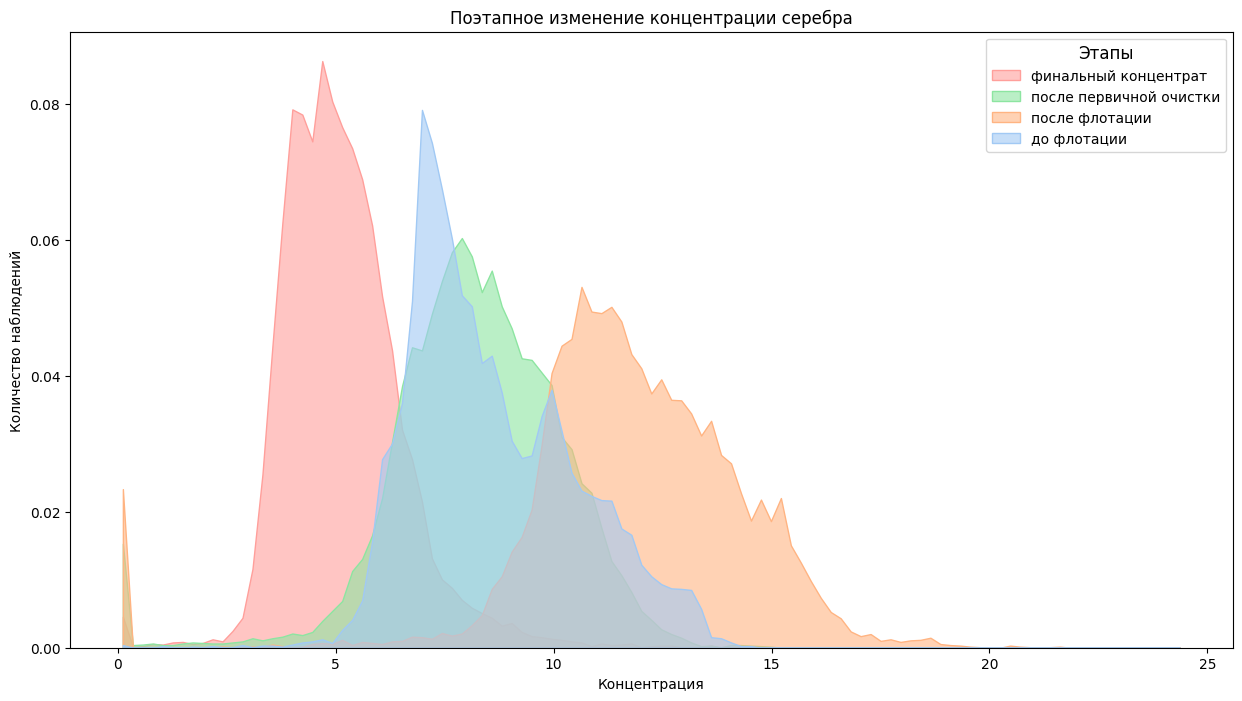

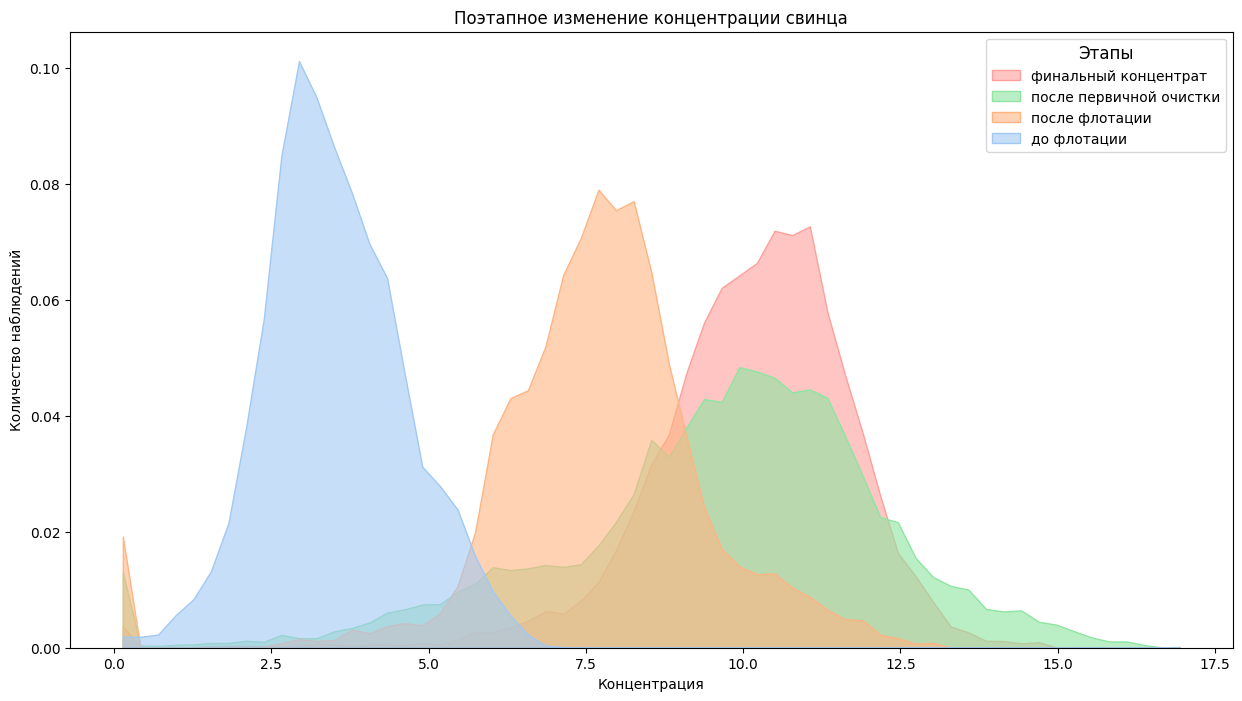

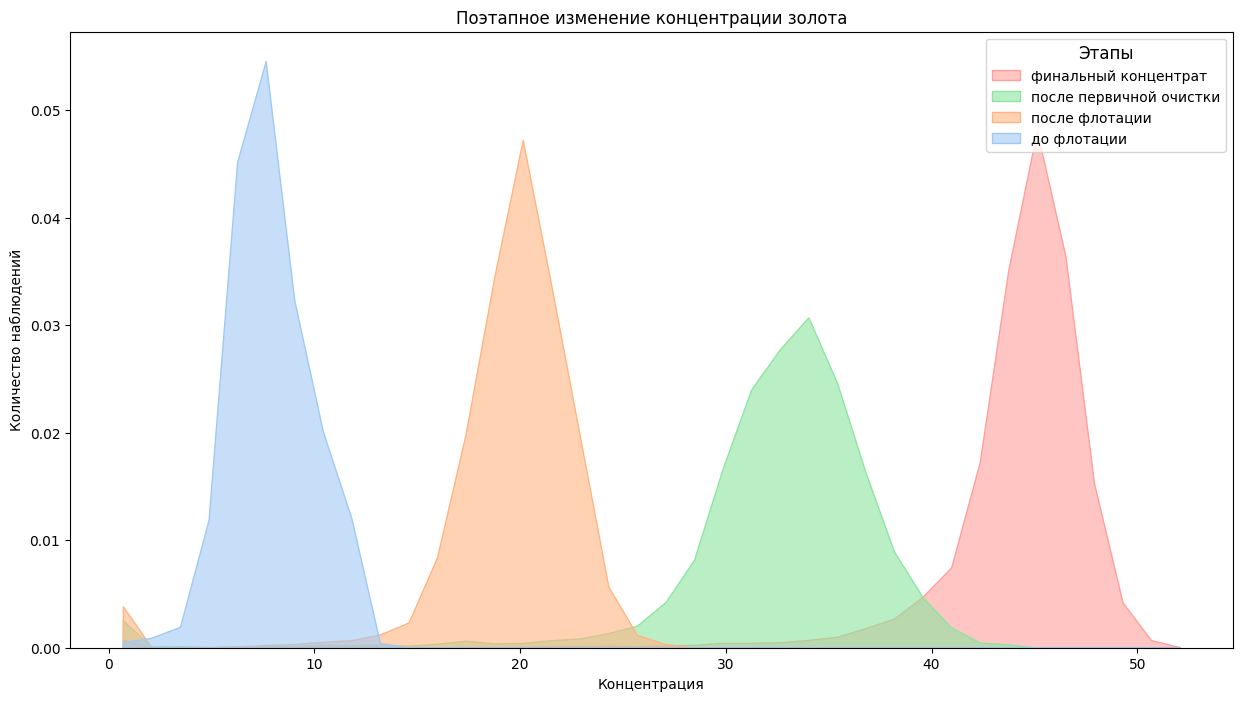

In [25]:
metall = ['серебра', 'свинца', 'золота']
i = 0

for c in [ag, pb, au]:
    plt.figure(figsize=(15,8))
    sns.histplot(
        train_new[c],
        palette='pastel',
        stat="density",
        element="poly",
        alpha=0.6,
)
    plt.xlabel('Концентрация')
    plt.ylabel('Количество наблюдений')
    plt.title(('Поэтапное изменение концентрации {metall}'.format(metall=metall[i])))
    plt.legend(['финальный концентрат', 'после первичной очистки', 'после флотации', 'до флотации'], 
           title = "Этапы", title_fontsize = 12)
    i += 1
    plt.show()

<div style="border:solid blue 2px; padding: 30px">

   Количество серебра с каждым этапом очистки уменьшается: после флотации доля серебра в концентрате увеличилась по сравнению с долей в сырье, а затем с каждым последующим этапом стала уменьшаться. Изначальный диапазон доли концентрации серебра был ~5-15, финальный стал ~3-10.

Количество свинца с каждым этапом очистки увеличивается: после флотации доля свинца увеличилась более чем в два раза, после очистки стала еще выше. Изначальный диапазон доли концентрации свинца был ~0-7, финальный стал ~5-15.

Концентрация золота поэтапно увеличивается, с изначального диапазона ~0-13 до финального ~30-52.

In [26]:
# создадим таблицу с суммарными концентрациями металлов на каждом из четырех этапах
data_sns = pd.DataFrame({'rougher_input': train_new[ag[0]] + train_new[pb[0]] + train_new[au[0]],
                         'rougher_output': train_new[ag[1]] + train_new[pb[1]] + train_new[au[1]],
                         'primary_cleaner_output': train_new[ag[2]] + train_new[pb[2]] + train_new[au[2]],
                         'final_output': train_new[ag[3]] + train_new[pb[3]] + train_new[au[3]]})

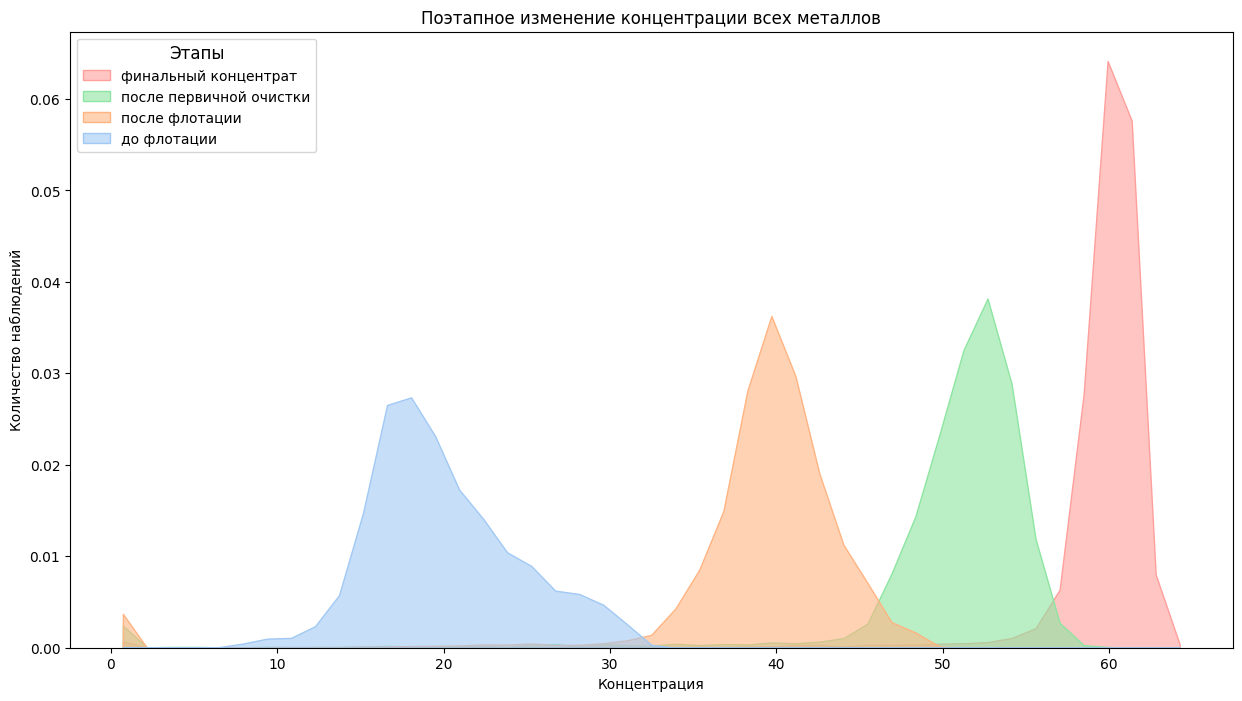

In [27]:
plt.figure(figsize=(15,8))
sns.histplot(data_sns,
    palette='pastel',
    stat="density",
    element="poly",
    alpha=0.6,
)
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.title('Поэтапное изменение концентрации всех металлов')
plt.legend(['финальный концентрат', 'после первичной очистки', 'после флотации', 'до флотации'], 
           title = "Этапы", title_fontsize = 12, loc='upper left')
plt.show()

<div style="border:solid blue 2px; padding: 30px">

   Суммарная концентрация всех металлов поэтапно увеличивается и со среднего значения доли металлов в поступающей смеси золотосодержащей руды равной 20 увеличивается в финальном концентрате до 59.

### Распределения размеров гранул сырья на обучающей и тестовой выборках.

Построим графики kdeplot для сравнения распределения значений размеров гранул сырья feed size. Первый график для размеров до флотации, второй для размеров в черновом концентрате после флотации.

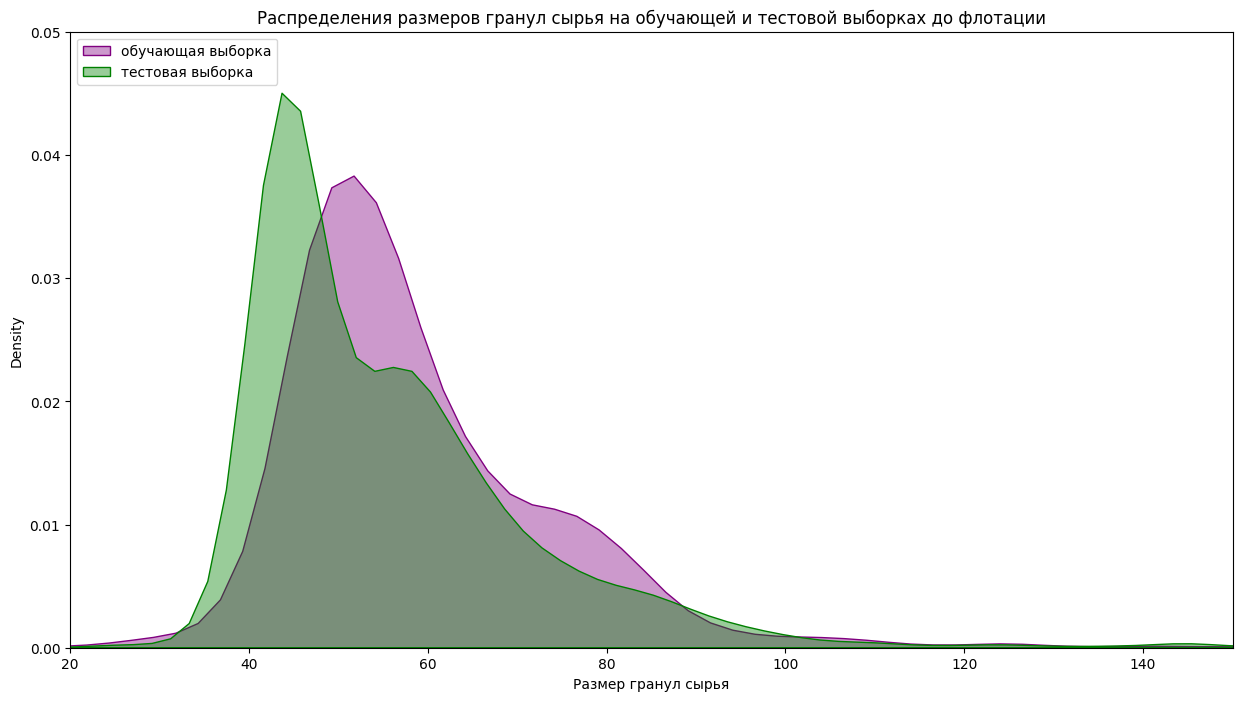

In [28]:
plt.subplots(figsize=(15,8)) 
sns.kdeplot(data=train_new['rougher.input.feed_size'],
             alpha=0.4,
             color='purple',
             shade=True,
)
sns.kdeplot(data=test['rougher.input.feed_size'],
             alpha=0.4,
             color='g',
             shade=True,
)


plt.xlim(20, 150)
plt.ylim(0, 0.05)
plt.xlabel('Размер гранул сырья')
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках до флотации')
plt.legend(['обучающая выборка', 'тестовая выборка'], 
         title_fontsize = 12, loc='upper left')
plt.show()

Посмотрим на выбросы в тренировочной выборке.

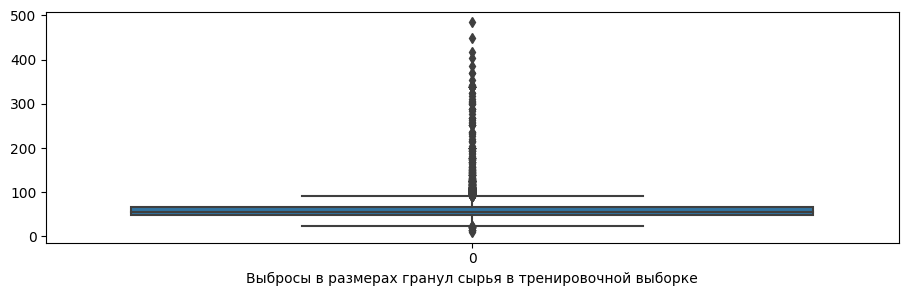

In [29]:
plt.figure(figsize=(11, 3))

# plt.subplot(122)
sns.boxplot(train_new['rougher.input.feed_size'])
plt.xlabel('Выбросы в размерах гранул сырья в тренировочной выборке')
plt.show()

Избавимся от выбросов. В трейне это размеры гранул больше 400.

In [30]:
train_new = train_new.loc[train_new['rougher.input.feed_size'] < 400].reset_index(drop=True)

In [31]:
train_new.shape

(14145, 87)

Теперь посмотрим на распределения размеров гранул сырья после флотации.

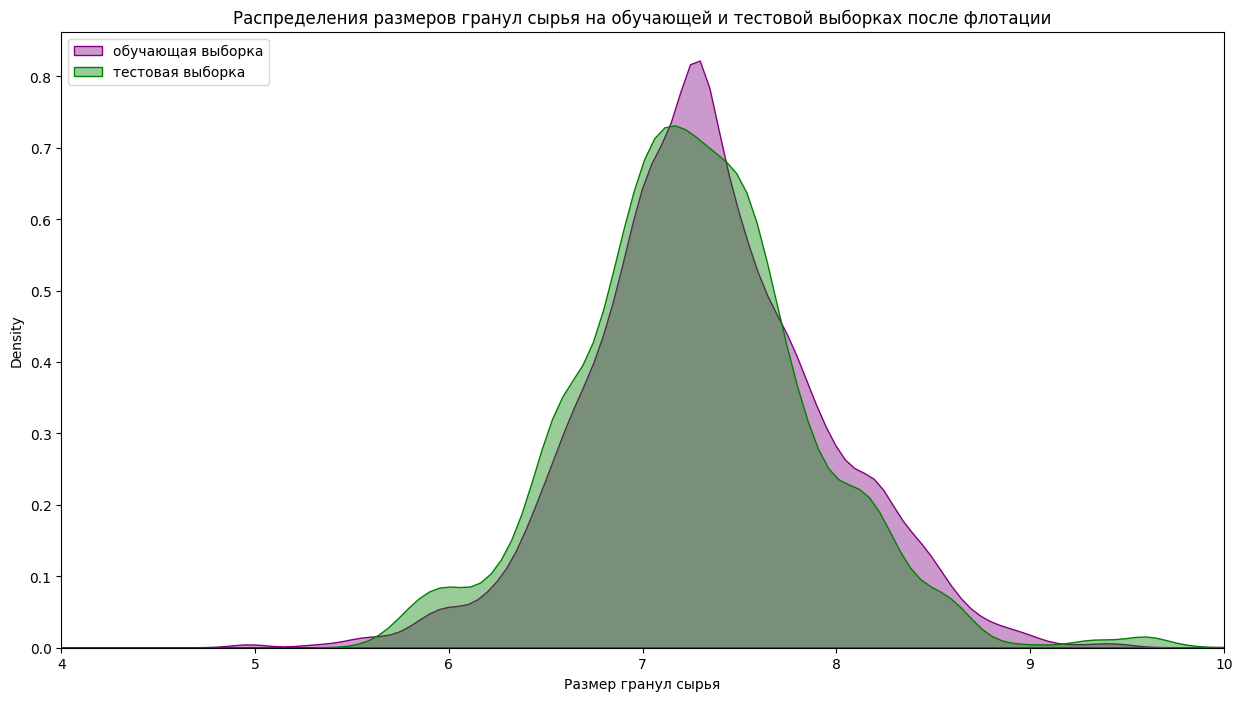

In [32]:
plt.subplots(figsize=(15,8)) 
sns.kdeplot(data=train_new['primary_cleaner.input.feed_size'],
             alpha=0.4,
             color='purple',
             shade=True,
)
sns.kdeplot(data=test['primary_cleaner.input.feed_size'],
             alpha=0.4,
             color='g',
             shade=True,
)


plt.xlim(4, 10)
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках после флотации')
plt.xlabel('Размер гранул сырья')
plt.legend(['обучающая выборка', 'тестовая выборка'], 
         title_fontsize = 12, loc='upper left')
plt.show()

Распределения размера гранул до флотации и после похожи друг на друга, на оценку модели негативного влияния этот признак не окажет.

### Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Создадим таблицу с четырьмя столбцами: date для индетификации строк, сырье при подаче в очистку (feed), черновой концентрат (rougher) и финальный (final). Для каждого посчитаем сумму веществ серебра, свинца, золота и золи.

In [45]:
sum_substance = pd.DataFrame({'date': train_new['date'],
                              'feed':  train_new[['rougher.input.feed_ag', 'rougher.input.feed_pb', 
'rougher.input.feed_sol', 'rougher.input.feed_au']].sum(axis=1),
                              'rougher': train_new[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1),
                              'final': train_new[['final.output.concentrate_ag', 'final.output.concentrate_pb', 
'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1)})

sum_substance.head()

,date,feed,rougher,final
0,2016-01-15 00:00:00,51.680034,66.424950,63.644396
1,2016-01-15 01:00:00,50.659114,67.012710,63.957723
2,2016-01-15 02:00:00,50.609929,66.103793,64.311180
3,2016-01-15 03:00:00,51.061546,65.752751,63.573449
4,2016-01-15 04:00:00,47.859163,65.908382,64.004667


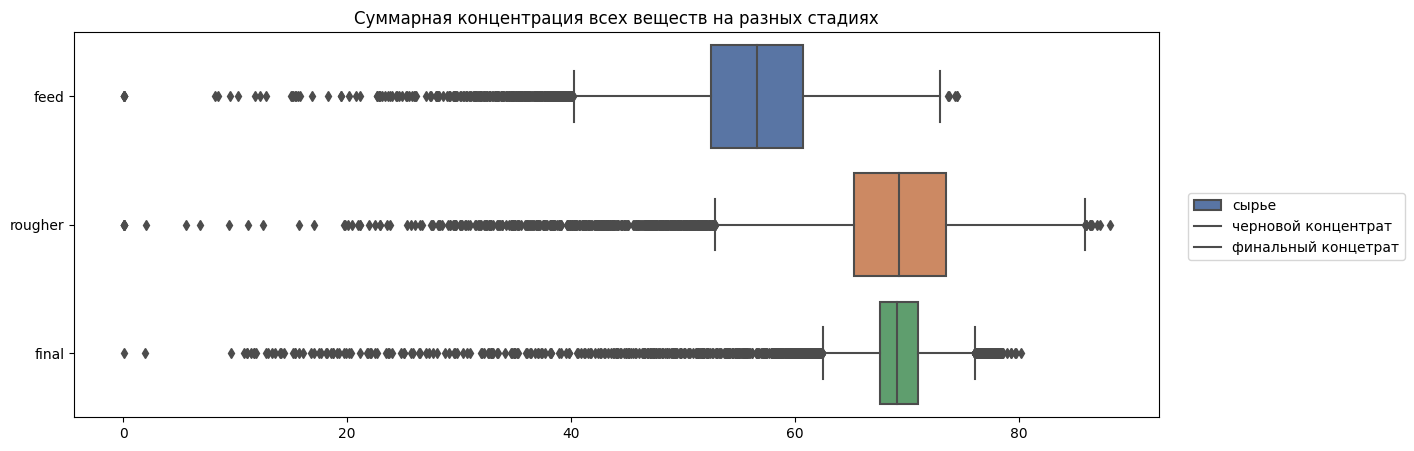

In [91]:
plt.subplots(figsize=(14,5)) 

plt.title('Суммарная концентрация всех веществ на разных стадиях')

sns.boxplot(data=sum_substance[['feed', 'rougher', 'final']], orient='h', palette='deep')
plt.legend(['сырье', 'черновой концентрат', 'финальный концетрат'], bbox_to_anchor=( 1.02 , 0.6))
plt.show()

Оставим в таблице только данные с нулевыми суммами веществ. 

In [35]:
sum_substance = sum_substance[(sum_substance['feed']==0) | 
                                (sum_substance['rougher']==0) | (sum_substance['final']==0)]

sum_substance.head()

,date,feed,rougher,final
45,2016-01-16 21:00:00,58.602038,0.0,66.175996
46,2016-01-16 22:00:00,59.921613,0.0,66.794250
47,2016-01-16 23:00:00,57.269041,0.0,67.572604
48,2016-01-17 00:00:00,25.352358,0.0,65.598903
49,2016-01-17 02:00:00,40.721375,0.0,63.445359


In [36]:
train_new.shape

(14145, 87)

Мы обнаружили, что в некоторых случаях суммарная концентрация оказалась равна 0. Это не корректные результаты, так как суммарно, но хоть какие-то элементы в руде будут. А ноль говорит о большой вероятности неточности в измерениях.
Избавимся от этих строк, чтобы модель обучилась корректнее.

In [37]:
train_new = train_new.query('date not in @sum_substance.date').reset_index(drop=True)
train_new.shape

(13791, 87)

<div style="border:solid blue 2px; padding: 30px">

Здесь я исследовала изменение концентрации металлов на каждом этапе, было выявлено, что:
    
* концентрация золота увеличивается и в итоге становится выше в среднем в 5 раз;

* количество серебра уменьшается;
    
* количество свинца увеличивается в 2-4 раза. 
    
Суммарная концентрация всех металлов поэтапно увеличивается и в среднем значение доли металлов в финальном концентрате становится в 3 раза больше, чем на этапе получения сырья во флатационную установку.
   
Затем, я проверила распределения размера гранул до флотации и после. Они оказались похожи друг на друга, что благоприятно повлияет на оценку модели.
    
В завершение была исследована суммарная концентрация всех веществ на разных стадиях и обнаружено, что в некоторых случаях она оказалась равна 0. Это не корректные результаты, нулевой концентрации после этапа флотации или в финальном концентрате быть не может, потому что нулевых значений на этапе подаче сырья в очистку не было, эти строки были удалены, для более корректного обучения модели.

## Обучение моделей

**Подготовим выборки к обучению модели**

Так как для обучения модели нам понадобятся только те признаки, которые есть в выборке test, то удалим отсутствующие в тесте столбцы из выборки train. Таргеты rougher.output.recovery и final.output.recovery оставим.

In [38]:
train_drop = train_new.drop(['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol'], axis=1)

In [39]:
# проверим размеры выборок
print(train_drop.shape)
print(test.shape)

(13791, 55)
(5290, 53)


В тестовой у нас отсутствуют столбцы с таргетами, поэтому размеры выборок корректные.

Разделим наши выборки на признаки и целевые признаки. Целевыми у нас будут: эффективность обогащения чернового концентрата rougher.output.recovery и эффективность обогащения финального концентрата final.output.recovery.

In [40]:
features_train = train_drop.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = train_drop[['rougher.output.recovery', 'final.output.recovery']]

features_test = test.drop('date', axis=1)
# создадим target_test добавив значения целевых признаков из исходных данных, 
# соответствующие датам тестовой выборки
target_test = full.query('date in @test.date')[
    ['rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)

### Функция для вычисления итоговой sMAPE.

**Формулы метрик качества:**

![jupyter](https://pictures.s3.yandex.net/resources/smape_1576238825.jpg)
![jupyter](https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg)

Напишем функцию для измерения метрики sMape отдельно для каждого таргета.

In [41]:
def f_smape(target, predict):
        
        values = []
        for i in range(len(target)):
            value = ((abs(target[i] - predict[i])) / ((abs(target[i]) + abs(predict[i]))/2)) * 100
            values.append(value)    
        smape =  sum(values) / len(target)
        
        return smape

И функцию для итоговой sMAPE.

In [42]:
def smape(smape_rougher, smape_final):
    smape = 0.25 * smape_rougher + 0.75 * smape_final
    return smape

Обучим 5 моделей: 
* деревянную DecisionTreeRegressor;
* линейные LinearRegression и LassoLars;
* модель градиентного бустинга CatBoost;
* простейшую Dummy.

Создадим таблицу, в которую будем сохранять метрики наших моделей:

In [43]:
result = pd.DataFrame({'sMAPE': [0.0, 0.0, 0.0, 0.0, 0.0]
}, index=['DecisionTree', 'LinearRegression', 'LassoLars', 'CatBoost', 'Dummy'])
result

,sMAPE
DecisionTree,0.0
LinearRegression,0.0
LassoLars,0.0
CatBoost,0.0
Dummy,0.0


### Обучение моделей с RandomizedSearchCV

Создадим функцию, в которой сначала подбираются лучшие гиперпараметры методом RandomizedSearchCV, выполняя кросс-валидацию с 8 фолдами, затем  модель обучается и считается метрика для каждого таргета отдельно и на выходе функция возвращает итоговое значение sMAPE.

In [ ]:
def smape_score(model, parameters, model_name):
    
    model_score = RandomizedSearchCV(
        model,
        param_distributions = parameters,
        scoring = make_scorer(f_smape, greater_is_better=False),
        n_iter=8,
        cv=10,
        random_state=123,
        return_train_score = True
)
    
    model_rougher = model_score.fit(features_train, target_train['rougher.output.recovery'].values)        
    print('Прогнозирование чернового концентрата:')
    print('Лучшая модель:', model_rougher.best_estimator_)
    smape_rougher = model_rougher.best_score_ * -1
    print('Метрика sMAPE = ', smape_rougher)
    print()
    print()
    
    model_final = model_score.fit(features_train, target_train['final.output.recovery'].values)        
    smape_final = model_final.best_score_ * -1
    print('Прогнозирование финального концентрата:')
    print('Лучшая модель:', model_final.best_estimator_)
    print('Метрика sMAPE = ', smape_final)
    print()
    print()
    
    smape_score = smape(smape_rougher, smape_final)
    
    result['sMAPE'][model_name] = smape_score.round(4)
    
    return print('Итоговая sMAPE {} = {}'.format(model_name, smape_score))

**Обучим модель решающего дерева, подобрав гиперпараметры**

In [ ]:
model_tree = DecisionTreeRegressor(random_state=123)

parameters_tree = {
                'criterion': ('squared_error', 'absolute_error', 'poisson'),
                'splitter': ('best', 'random'),
                'max_depth': range (1, 9, 1),
                'min_samples_leaf': range (1, 5, 1)
}

smape_score_tree = smape_score(model_tree, parameters_tree, 'DecisionTree')
smape_score_tree

Прогнозирование чернового концентрата:
Лучшая модель: DecisionTreeRegressor(criterion='poisson', max_depth=6, min_samples_leaf=3,
                      random_state=123)
Метрика sMAPE =  7.71864977286017


Прогнозирование финального концентрата:
Лучшая модель: DecisionTreeRegressor(criterion='poisson', max_depth=6, min_samples_leaf=3,
                      random_state=123)
Метрика sMAPE =  10.489473148426294


Итоговая sMAPE DecisionTree = 9.796767304534763


**Обучим модель линейной регрессии, подобрав гиперпараметры и вычислив итоговую метрику.**

In [ ]:
model_linear = LinearRegression(fit_intercept=True)
parameters_linear = {'n_jobs': (-1, 1)}

smape_score_linear = smape_score(model_linear, parameters_linear, 'LinearRegression')
smape_score_linear

Прогнозирование чернового концентрата:
Лучшая модель: LinearRegression(n_jobs=-1)
Метрика sMAPE =  6.213045108297155


Прогнозирование финального концентрата:
Лучшая модель: LinearRegression(n_jobs=-1)
Метрика sMAPE =  10.366460585891538


Итоговая sMAPE LinearRegression = 9.328106716492943


### Обучение моделей с Pipeline
**Создадим функцию для рассчета метрики без подбора гиперпараметров.**

In [100]:
def smape_cross_val(model, model_name):
    
    cross_rougher = cross_val_score(model, 
                               features_train, target_train['rougher.output.recovery'].values,
                               scoring = make_scorer(f_smape, greater_is_better=False),
                               cv=10
    )

    smape_rougher = cross_rougher.mean() * -1
    print('Метрика sMAPE при прогнозировании чернового концентрата =', smape_rougher)

    cross_final= cross_val_score(model, 
                               features_train, target_train['final.output.recovery'].values,
                               scoring = make_scorer(f_smape, greater_is_better=False),
                               cv=10
    )

    smape_final = cross_final.mean() * -1
    print('Метрика sMAPE при прогнозировании финального концентрата =', smape_final)

    smape_score_cross = smape(smape_rougher, smape_final)
    
    result['sMAPE'][model_name] = smape_score_cross.round(4)
    
    return print('Итоговая sMAPE модели {} = {}'.format(model_name, smape_score_cross))    

**Обучим модель Лассо (alpha=0.003), используя конвеерную обработку, чтобы избежать утечки данных внутри кросс-валидации. Вычислим итоговую метрику.**

In [ ]:
%%time

model_lasso = LassoLars(alpha=0.003, random_state=123)

pipe = make_pipeline(StandardScaler(), model_lasso)

smape_cross_val(pipe, 'LassoLars')
print()

Метрика sMAPE при прогнозировании чернового концентрата = 6.186324925841096
Метрика sMAPE при прогнозировании финального концентрата = 9.178737938499703
Итоговая sMAPE модели LassoLars = 8.430634685335052

CPU times: user 1.52 s, sys: 2.27 s, total: 3.79 s
Wall time: 3.76 s


**Обучим модель градиентного бустинга, без подбора гиперпараметров, оценив качество кросс-валидацией. Зададим количество деревьев 70, глубину 4, скорость обучения 0.03. Вычислим итоговую метрику.**

In [101]:
%%time

model_catboost = CatBoostRegressor(iterations=70, depth=4, learning_rate=0.03, verbose=False, random_state=123)

smape_cross_val(model_catboost, 'CatBoost')
print()

Метрика sMAPE при прогнозировании чернового концентрата = 5.994003870586969
Метрика sMAPE при прогнозировании финального концентрата = 8.947761939608942
Итоговая sMAPE модели CatBoost = 8.209322422353448

CPU times: user 23.3 s, sys: 639 ms, total: 24 s
Wall time: 15.2 s


**Для проверки лучшей модели на адекватность, сравним её с простейшей.**

In [ ]:
model_dummy = DummyRegressor(strategy='mean')

smape_cross_val(model_dummy, 'Dummy')
print()

Метрика sMAPE при прогнозировании чернового концентрата = 7.737085583399514
Метрика sMAPE при прогнозировании финального концентрата = 10.499006103270652
Итоговая sMAPE модели Dummy = 9.808525973302867



In [ ]:
result

,sMAPE
DecisionTree,9.7968
LinearRegression,9.3281
LassoLars,8.4306
CatBoost,8.2093
Dummy,9.8085


У модели CatBoost лучшая метрика sMAPE (= 8.2093). Эта модель прошла проверку на адекватность. Метрика выше, чем у baseline-модели. Теперь проверим её работу на тестовых данных.

### Лучшая модель и проверка на тестовой выборке.

In [93]:
model_catboost.fit(features_train, target_train['rougher.output.recovery'])
predict_rougher = model_catboost.predict(features_test)
smape_rougher_cat = f_smape(target_test['rougher.output.recovery'], predict_rougher)
print('Метрика sMAPE при прогнозировании чернового концентрата =', smape_rougher_cat)
print()

model_catboost.fit(features_train, target_train['final.output.recovery'])
predict_final = model_catboost.predict(features_test)
smape_final_cat = f_smape(target_test['final.output.recovery'], predict_final)
print('Метрика sMAPE при прогнозировании финального концентрата =', smape_final_cat)
print()

smape_score_cat = smape(smape_rougher_cat, smape_final_cat)
print('Итоговая sMAPE лучшей модели на тестовой выборке =', smape_score_cat)

Метрика sMAPE при прогнозировании чернового концентрата = 7.590967897027859

Метрика sMAPE при прогнозировании финального концентрата = 8.905732152635833

Итоговая sMAPE лучшей модели на тестовой выборке = 8.57704108873384


Итоговая метрика качества работы лучшей модели на тестовых данных равна 8.577. Визуализируем результат работы модели.

### Визуализация предсказаний модели.

Построим график, на котором синим цветом будут обозначены наши таргеты на тестовой выборке, а красным предсказания лучшей модели.

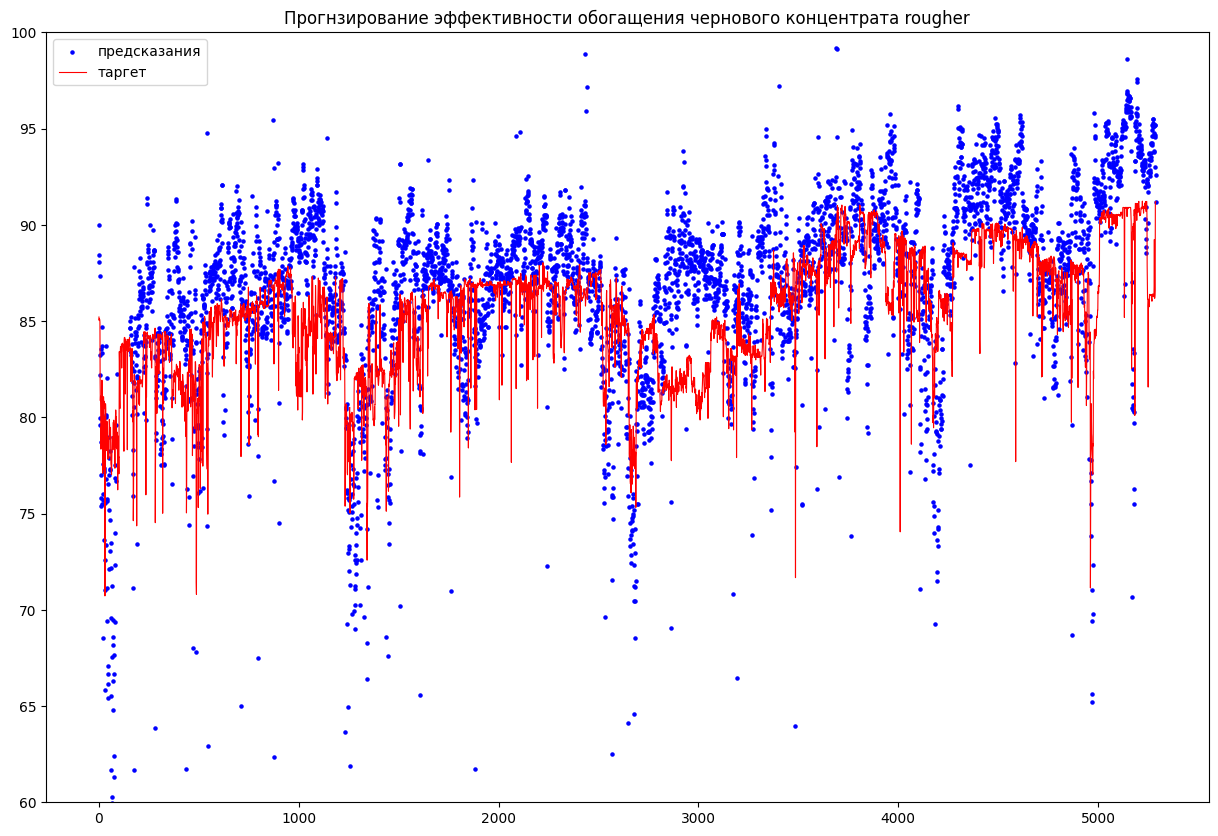

In [98]:
plt.figure(figsize=(15,10))
x_ax = range(len(features_test))
plt.scatter(x_ax, target_test['rougher.output.recovery'], s=5, color="blue", label="target_rougher")
plt.plot(x_ax, predict_rougher, lw=0.8, color="red", label="predicted")
plt.ylim(60,100)

plt.title('Прогнзирование эффективности обогащения чернового концентрата rougher.output.recovery')
plt.legend(['предсказания', 'таргет'],  loc='upper left')
plt.show()

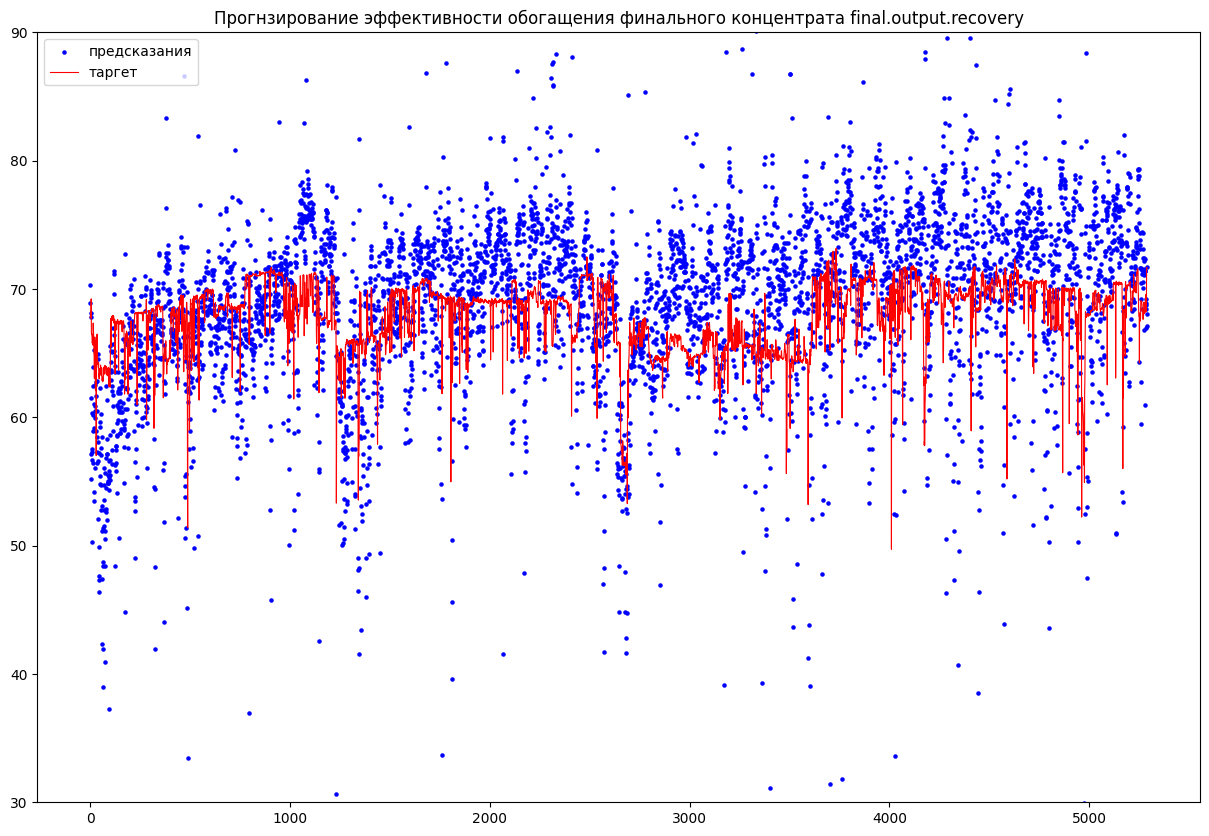

In [99]:
plt.figure(figsize=(15,10))
x_ax = range(len(features_test))
plt.scatter(x_ax, target_test['final.output.recovery'], s=5, color="blue", label="target_final")
plt.plot(x_ax, predict_final, lw=0.8, color="red", label="predicted")
plt.ylim(30,90)

plt.title('Прогнзирование эффективности обогащения финального концентрата final.output.recovery')
plt.legend(['предсказания', 'таргет'],  loc='upper left')
plt.show()

### РЕЗУЛЬТАТЫ РАБОТЫ

<div style="border:solid blue 2px; padding: 30px">

Для обучения моделей я подготовила необходимые признаки. Были удалены из обучающей выборки фичи, которые не доступны в тестовой. Провела проверку правильности расчетов эффективности обогащения чернового и финального концетратов. Получила значение MAE (средняя абсолютная ошибка) между моими расчётами и значением признака, имеющимся в данных, близкой к 0, что говорит о корректности данных.

Затем провела предобработку данных, заполнив пропуски методом ffill, который заполняет пропуск предыдущим имеющимся значением.

После, я исследовала изменение концентрации металлов на каждом этапе, было выявлено, что:
    
* концентрация золота увеличивается и в итоге становится выше в среднем в 5 раз;

* количество серебра уменьшается;
    
* количество свинца увеличивается в 2-4 раза. 
    
Суммарная концентрация всех металлов поэтапно увеличивается и в среднем значение доли металлов в финальном концентрате становится в 3 раза больше, чем на этапе получения сырья во флатационную установку.
   
Затем, я проверила распределения размера гранул до флотации и после. Они оказались похожи друг на друга, что благоприятно повлияет на оценку модели.
    
В завершение предобработки была исследована суммарная концентрация всех веществ на разных стадиях и удалены наблюдения с нулевой концентрацией после этапа флотации или в финальном концентрате.
    
В тестовом наборе у нас не было таргетов, их я достала из исходных данных. Затем я написала функцию для расчета метрики sMAPE, которая будет считаться для каждого таргета, а также функцию, которая выполняет обучение модели и возвращается итоговое значение sMAPE. 

Было обучено 5 моделей: деревянная DecisionTreeRegressor, линейные LinearRegression и LassoLars, модель градиентного бустинга CatBoost и простейшая Dummy для проверки на адекватность лучшей модели. Результаты метрики качества каждой модели помещены в таблицу result.
    
Лучшую метрику дала модель градиентного бустинга CatBoost, sMAPE = 8.209. Мы её проверили на адекватность, сравнив с Dummy-моделью. 
И провели итоговую проверку на тестовой выборке. В результате  на тестовой выборке наша модель показала sMAPE = 8.58.

В конце проекта была выполнена визуализация работы модели машинного обучения CatBoost, на которой видно какие значения предсказывает модель (красный цвет) и реальные значения (синий цвет).